# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [221]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [224]:
# 데이터 로드
data = pd.read_csv("./abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [227]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [229]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [233]:
#필요한 모듈 불러오기
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [236]:
#릿지모델 생성 및 훈련
ridge_reg = Ridge(alpha=0.3)
ridge_reg.fit(X_train, y_train)

#예측값 구하기
y_pred = ridge_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_age = y_pred + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))

MSE:5.013, RMSE:2.239


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [239]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [241]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
alpha_rmse = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_rmse_scores = cross_val_score(ridge, X, y, scoring='neg_root_mean_squared_error', cv=5)
    mean_rmse = -np.mean(neg_rmse_scores)
    alpha_rmse[alpha] = mean_rmse
    print(f'Alpha={alpha}: 평균 RMSE = {mean_rmse:.4f}')
    
best_alpha = min(alpha_rmse, key=alpha_rmse.get)
print(f'\n 가장 낮은 평균 RMSE를 가진 alpha: {best_alpha} (RMSE: {alpha_rmse[best_alpha]:.4f}')

Alpha=0: 평균 RMSE = 2.2415
Alpha=0.1: 평균 RMSE = 2.2371
Alpha=1: 평균 RMSE = 2.2303
Alpha=10: 평균 RMSE = 2.3373
Alpha=100: 평균 RMSE = 2.6212

 가장 낮은 평균 RMSE를 가진 alpha: 1 (RMSE: 2.2303


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [245]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [248]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

#예측값 구하기
xgb_pred = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
xgb_pred_age = xgb_pred + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_pred_age, xgb_pred_age)
rmse = np.sqrt(mse)
print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))

MSE:1.609, RMSE:1.268


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

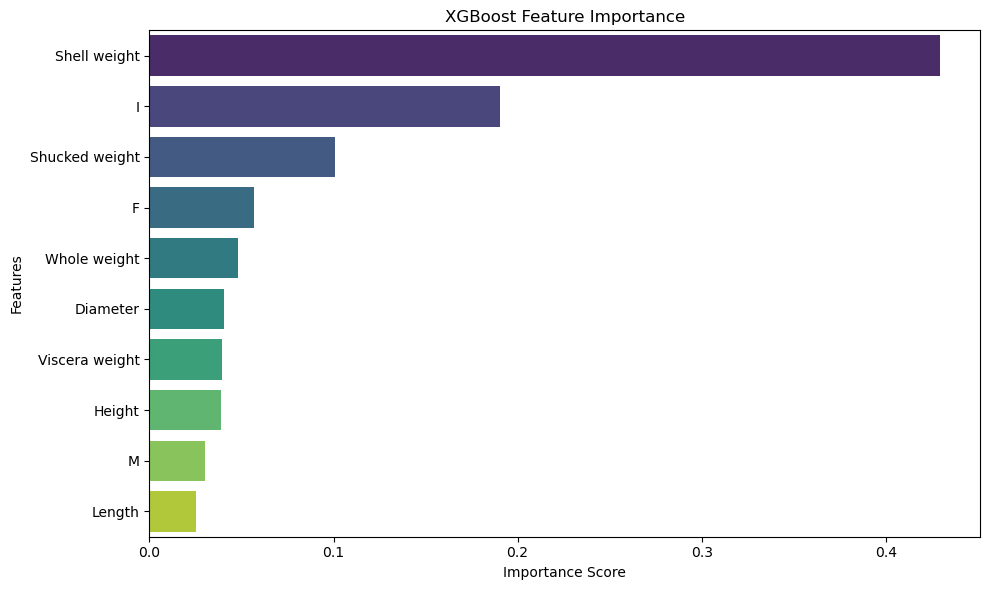

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances=xgb_reg.feature_importances_

importance_df=pd.Series(feature_importances, index=data.columns)
importance_df=importance_df.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importance_df.values, y=importance_df.index, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [160]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [163]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [166]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

print(x_train.shape)
print(y_train.shape)

(124, 13)
(124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [170]:
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [172]:
#기울기
print(lr_clf.coef_)

[[-5.73015178e-01  5.81671596e-01  5.47844872e-01 -2.69120941e-01
   1.22372562e-04  2.35676305e-01  9.37515599e-01  6.39887522e-02
  -3.63909078e-02  1.34963515e-01 -1.35009953e-01  5.26299012e-01
   8.78682506e-03]
 [ 6.68915440e-01 -9.14773356e-01 -5.79394296e-01  2.15078767e-01
  -2.14312762e-02  3.03018569e-01  4.23888553e-03  1.05831948e-01
   5.64387559e-01 -8.22431762e-01  5.34359887e-01  2.21652867e-01
  -7.99240243e-03]
 [-9.59002625e-02  3.33101760e-01  3.15494244e-02  5.40421743e-02
   2.13089037e-02 -5.38694874e-01 -9.41754485e-01 -1.69820700e-01
  -5.27996651e-01  6.87468246e-01 -3.99349935e-01 -7.47951879e-01
  -7.94422636e-04]]


In [174]:
#절편
print(lr_clf.intercept_)

[-0.42783792  0.58858755 -0.16074963]


3-3) 모델의 정확도를 구하세요.

In [181]:
#모델의 예측값 구하기
lr_preds = lr_clf.predict(x_test)

#모델의 정확도 구하기
accuracy = lr_clf.score(x_test, y_test)
print('accuracy: {0:.3f}'.format(accuracy*100))

accuracy: 94.444
